# 17: CORRELACIÓN ENTRE VARIABLES

La correlación entre variables se da cuando dos variables estan relacionadas directa o inversamente proporcional. De este modo, recurriremos a la ecuación de la correlación de Pearson. Este resultado va a marcar cuanta correlación hay entre dos variables:

- Pearson = 0 --> NO CORRELACION (Cuanto más cercano a 0, mneos correlación entre las variables)
- Pearson = 1 --> CORRELACION DIRECTAMENTE PROPORCIONAL
- Pearson = -1 --> CORRELACION INVERSAMENTE PROPORCIONAL

In [1]:
import pandas as pd
import numpy as np
import os

In [10]:
raiz = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Recursos_curso\datasets"
fichero = r"ads\Advertising.csv"
ruta = os.path.join(raiz, fichero) 
data = pd.read_csv(ruta)

In [11]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
columnas = data.columns.values
columnas

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

### Demostración de la fórmula de Pearson paso a paso

In [13]:
# Crear una columna del dataframe con el primer numerador de la fórmula. En este caso vamos a ver la correlación entre 'sales' y 'TV'

data['numerador_1'] = (data['TV'] - np.mean(data['TV'])) * (data['Sales'] - np.mean(data['Sales']))

In [14]:
# Crear una columna con el primer denominador de la fórmula

data['denominador_1'] = (data['TV'] - np.mean(data['TV'])) ** 2 # esto siginifca que se pone al cuadrado

In [15]:
# Crear una columna con el segundo denominador de la fórmula

data['denominador_2'] = (data['Sales'] - np.mean(data['Sales'])) ** 2

In [16]:
data.head()

,TV,Radio,Newspaper,Sales,numerador_1,denominador_1,denominador_2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [17]:
# Calcular el estadísitco de Pearson

pearson = (sum(data['numerador_1'])) / (np.sqrt(sum(data['denominador_1']) * sum(data['denominador_2'])))
pearson

0.7822244248616064

Este resultado es cercano a 1 por lo que se puede afirmar que hay cierta correlacióin directamente proporcional entre la variable TV y Sales

### Crear una función para calcular la correlación entre dos variables 

In [18]:
def correlacion(df, variable_1, variable_2):
    numerador = sum((df[variable_1] - np.mean(df[variable_1])) * (df[variable_2] - np.mean(df[variable_2])))
    denominador_1 = sum((df[variable_1] - np.mean(df[variable_1])) ** 2)
    denominador_2 = sum((df[variable_2] - np.mean(df[variable_2])) ** 2)
    pearson = numerador / (np.sqrt(denominador_1 * denominador_2))
    return pearson

In [19]:
correlacion(data, 'TV', 'Sales')

0.7822244248616064

### Calcular la correlación entre las variables 'TV', 'Radio' y 'Newspaper', y la variable 'Sales'

In [23]:
for i in columnas:
    if not i == 'Sales':
        print(f'La correlación entre \'{i}\' y \'Sales\' es {correlacion(data, i, 'Sales')}')

La correlación entre 'TV' y 'Sales' es 0.7822244248616064
La correlación entre 'Radio' y 'Sales' es 0.5762225745710553
La correlación entre 'Newspaper' y 'Sales' es 0.22829902637616536


Así pues, podemos ver que solo tenemos una correlación entre 'TV' y 'Sales'

### Comprobar la posible correlación mediante un plot

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, "'TV' VS 'Sales'")

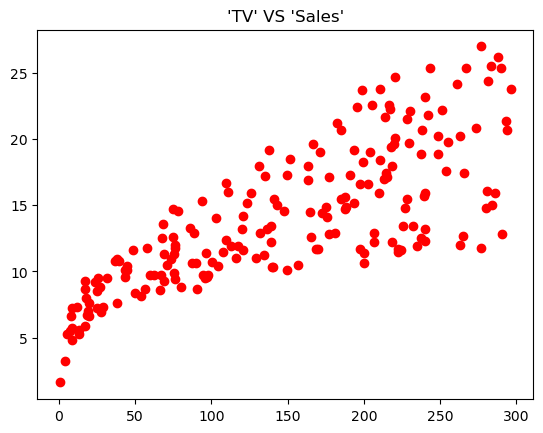

In [29]:
# TV VS Sales

plt.plot(data['TV'], data['Sales'], 'ro') # 'ro' es para que el plot sea de puntos rojos
plt.title("\'TV\' VS \'Sales\'")

Text(0.5, 1.0, "'Radio' VS 'Sales'")

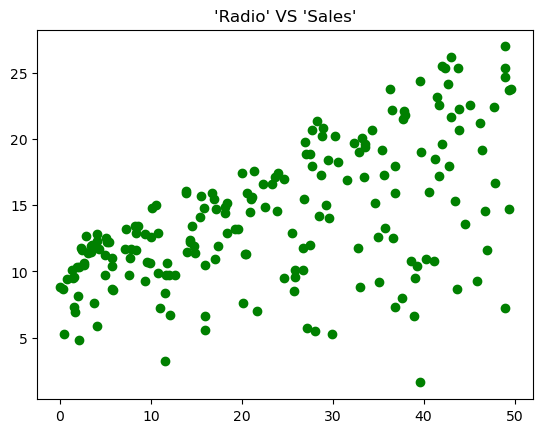

In [30]:
# Radio VS Sales

plt.plot(data['Radio'], data['Sales'], 'go') # 'go' es para que el plot sea de puntos verdes
plt.title("\'Radio\' VS \'Sales\'")

Text(0.5, 1.0, "'Newspaper' VS 'Sales'")

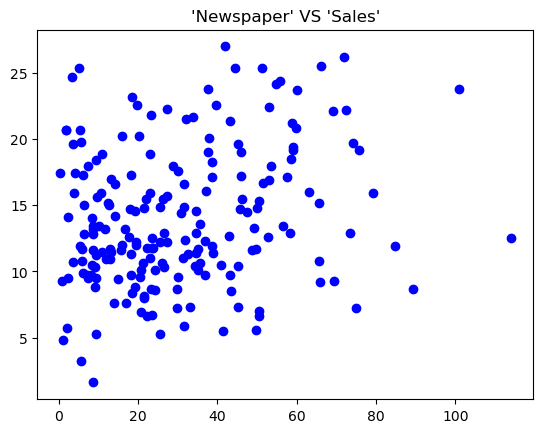

In [31]:
# Newspaper VS Sales

plt.plot(data['Newspaper'], data['Sales'], 'bo') # 'bo' es para que el plot sea de puntos azules
plt.title("\'Newspaper\' VS \'Sales\'")

### Calcular la correlación mediante una función propia del paquete pandas

In [32]:
data = pd.read_csv(ruta)

In [33]:
# Usar la función para calcular la correlación entre todas las variables del dataframe

data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Como se puede ver, cada varaible consigo misma tiene un coeficiente de 1

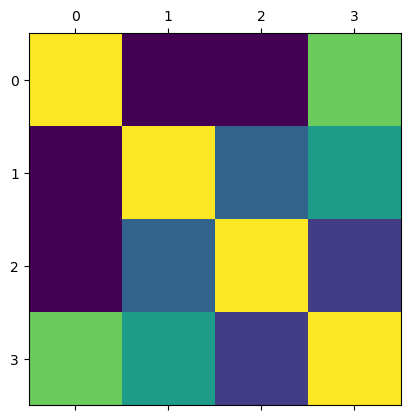

In [34]:
# Visualizarlo mediante un plot de mapa de densidad

plt.matshow(data.corr())